In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from pylab import rcParams
from sklearn.preprocessing import scale, LabelEncoder

%matplotlib inline
rcParams['figure.figsize']=12,6

In [78]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

In [80]:
titanic_training = pd.read_csv('data/titanic-training-data.csv')
titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
titanic_training.columns = [i.lower() for i in titanic_training.columns]
titanic_training.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
print(titanic_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


#### VARIABLE DESCRIPTIONS

- Survived = Survival (0 = No, 1 = Yes)
- Pclass = Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name = Name, Sex = Sex, Age = Age
- SibSp = # of siblings/spouses aboard
- Parch = # of Parents/Children
- Ticket = Ticket #
- Fare = Pass. far (GBP)
- Cabin = cabin
- Embarked - Port of embarkation (C = Cherbourg, France, Q = Queenstown, UK, S = Southamption- Ireland)

<AxesSubplot:xlabel='survived', ylabel='count'>

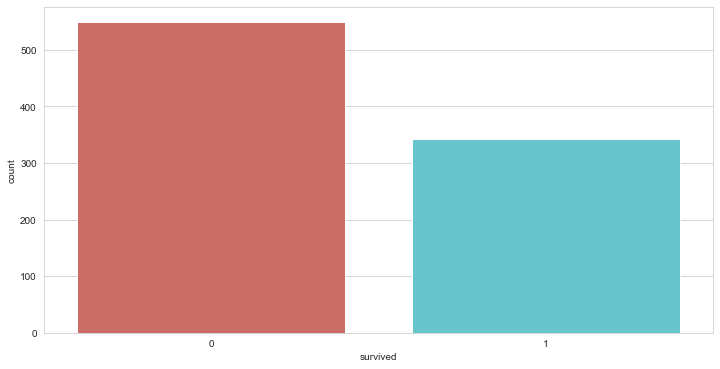

In [83]:
# Check for binary variables
sb.countplot(x = 'survived', data = titanic_training, palette = 'hls')

In [84]:
# Check for missing values
print(titanic_training.isnull().sum())
titanic_training.describe()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
titanic_data = titanic_training.drop(['name','ticket','cabin'],axis=1)
titanic_data.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [86]:
titanic_data.isnull().sum()

passengerid      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
dtype: int64

<AxesSubplot:xlabel='parch', ylabel='age'>

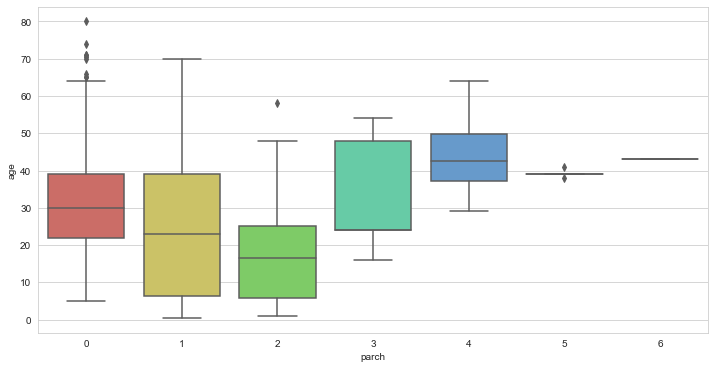

In [87]:
sb.boxplot(x='parch',y='age', data=titanic_data, palette = 'hls')

In [88]:
parch_groups = titanic_data.groupby(titanic_data['parch'])
parch_groups.mean()

,passengerid,survived,pclass,age,sibsp,fare
parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [89]:
def age_approx(cols):
    age = cols[0]
    parch=cols[1]
    
    if pd.isnull(age):
        if parch == 0:
            return 32
        elif parch == 1:
            return 24
        elif parch == 2:
            return 17
        elif parch == 3:
            return 33
        elif parch == 4:
            return 45
        else:
            return 30
    else:
        return age
        
    

In [90]:
titanic_data['age'] = titanic_data[['age','parch']].apply(age_approx, axis=1)

In [91]:
titanic_data.isnull().sum()

passengerid    0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
dtype: int64

In [95]:
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop=True)
titanic_data.isnull().sum()
titanic_data.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.837087,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.098453,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,31.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
label_encoder = LabelEncoder() ## This is called instantiating

gender_cat = titanic_data['sex']

# Converts gender into a binary form
gender_encoded = label_encoder.fit_transform(gender_cat)

In [101]:
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [102]:
# Determine what 1 indicates
titanic_data.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


1 = Male
0 = Female

In [103]:
gender_df = pd.DataFrame(gender_encoded, columns = ['male_gender'])
gender_df.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [106]:
embarked_cat = titanic_data['embarked']

embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:50]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2])

In [110]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories = 'auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_onehot_mat = embarked_1hot.toarray()
embarked_df = pd.DataFrame(embarked_onehot_mat, columns = ['C','Q','S'])

In [112]:
#Binary variable to represent where people boarded the ship
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [113]:
titanic_data.drop(['sex','embarked'], axis=1, inplace=True)
titanic_data.head()

,passengerid,survived,pclass,age,sibsp,parch,fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [115]:
titanic_dmy = pd.concat([titanic_data,gender_df,embarked_df], axis=1, verify_integrity = True).astype(float)
titanic_dmy[0:5]

,passengerid,survived,pclass,age,sibsp,parch,fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


<AxesSubplot:>

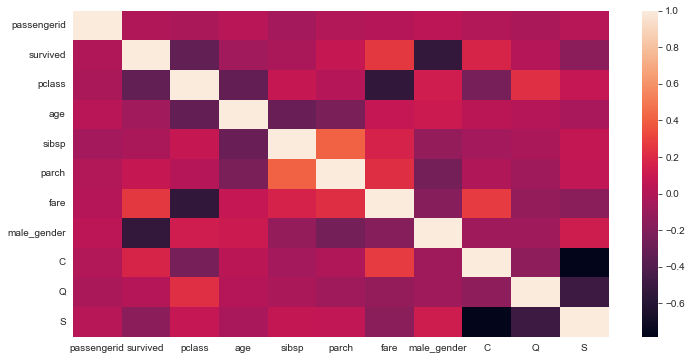

In [116]:
sb.heatmap(titanic_dmy.corr())

In [117]:
#No big corr b/w fare and pclass
titanic_dmy.drop(['fare','pclass'], axis=1, inplace=True)
titanic_dmy[0:5]

,passengerid,survived,age,sibsp,parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [120]:
x_train, x_test, y_train, y_test = train_test_split(titanic_dmy.drop('survived', axis=1),
                                                    titanic_dmy['survived'],
                                                    test_size=0.2, random_state=200)

In [122]:
print(x_train.shape)
print(y_train.shape)

(711, 8)
(711,)


In [124]:
x_train[0:5]

,passengerid,age,sibsp,parch,male_gender,C,Q,S
719,721.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


In [126]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [127]:
y_pred = LogReg.predict(x_test)

### Classification report with cross validation

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



### k-fold cross validation & confusion matrics

In [134]:
y_train_pred = cross_val_predict(LogReg,x_train, y_train, cv=5)

print('377 & 180 are correct preds and 63, 91 are incorrect preds')
print(confusion_matrix(y_train, y_train_pred))

377 & 180 are correct preds and 63, 91 are incorrect preds
[[377  63]
 [ 91 180]]


In [135]:
precision_score(y_train, y_train_pred)

0.7407407407407407

### Make a test pred

In [136]:
titanic_dmy[863:864]

,passengerid,survived,age,sibsp,parch,male_gender,C,Q,S
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [141]:
test_pass = np.array([856, 22, 0, 0, 0, 0, 0, 1]).reshape(1,-1)
print(LogReg.predict(test_pass))
print(LogReg.predict_proba(test_pass))

[1.]
[[0.23715759 0.76284241]]
